In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
df =df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#replace null values with the mode of each column

In [6]:
cats = df.select_dtypes(include=['object']).copy()


In [7]:
cats.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,Low Fat,Soft Drinks,Medium,Cluster 3,Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,Low Fat,Soft Drinks,High,Cluster 3,Supermarket Type1
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,Low Fat,Soft Drinks,Medium,Cluster 2,Supermarket Type1
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,Low Fat,Soft Drinks,Medium,Cluster 3,Supermarket Type2
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,Ultra Low fat,Soft Drinks,Small,Cluster 2,Supermarket Type1


In [8]:
t = cats.columns
for col in t:
    cats[col] = cats[col].astype('category')

In [9]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 8 columns):
Product_Identifier                4990 non-null category
Supermarket_Identifier            4990 non-null category
Product_Supermarket_Identifier    4990 non-null category
Product_Fat_Content               4990 non-null category
Product_Type                      4990 non-null category
Supermarket _Size                 4990 non-null category
Supermarket_Location_Type         4990 non-null category
Supermarket_Type                  4990 non-null category
dtypes: category(8)
memory usage: 300.8 KB


In [10]:
df2 = df.copy()

In [11]:
df2.drop(t,axis=1,inplace = True)

In [12]:
cats.drop('Product_Identifier',axis=1,inplace=True)

In [13]:
t = cats.columns

In [14]:
#use label encoding to convert categorical data to numerical representation
for col in t:
    cats[col] = cats[col].cat.codes

In [15]:
cats.head()

,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0,0,0,14,1,2,0
1,1,1,0,14,0,2,1
2,2,2,0,14,1,1,1
3,3,3,0,14,1,2,2
4,6,4,2,14,2,1,1


In [16]:
dataset = pd.concat([df2,cats], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler as ss

In [18]:
x = dataset.drop('Product_Supermarket_Sales',axis=1)
y = dataset['Product_Supermarket_Sales']

In [19]:
scaler = ss()
scaled_data = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_data, columns=x.columns.values)

c:\users\jo5h\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jo5h\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
scaled_x.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,-0.274915,0.030513,-0.287047,0.026132,-1.575282,-1.731704,-0.759027,1.575024,-0.254172,1.102882,-1.477086
1,-0.274915,-0.490159,-0.301708,-1.301998,-1.234300,-1.731010,-0.759027,1.575024,-1.901340,1.102882,-0.181715
2,-0.274915,-0.485151,-0.343596,1.112784,-0.893318,-1.730315,-0.759027,1.575024,-0.254172,-0.114950,-0.181715
3,-0.274915,-0.486372,-0.307991,1.354262,-0.552336,-1.729621,-0.759027,1.575024,-0.254172,1.102882,1.113656
4,-0.274915,-1.261307,-0.310086,0.750567,0.470610,-1.728927,2.799022,1.575024,1.392996,-0.114950,-0.181715


In [21]:
y

0         709.08
1        6381.69
2        6381.69
3        2127.23
4        2481.77
5        9572.54
6         818.93
7       11055.61
8        2866.27
9        1228.40
10      12284.01
11       8598.81
12       2456.80
13       6015.50
14      11105.54
15       1388.19
16      17583.78
17      11105.54
18       3239.12
19       1423.15
20       3795.06
21       8538.89
22       1423.15
23       9013.27
24       4633.97
25       5406.30
26      10426.43
27      10040.26
28        535.97
29       5091.71
          ...   
4960     1902.52
4961     8244.27
4962       94.88
4963    17122.71
4964     1902.52
4965    15220.19
4966     3805.05
4967     1258.36
4968     7550.17
4969     3460.50
4970      602.55
4971     1506.37
4972     2410.20
4973     6326.76
4974     2190.48
4975     6258.52
4976     4693.89
4977     4380.96
4978    10073.55
4979    10666.12
4980     4710.54
4981    14131.61
4982     9892.12
4983      812.28
4984     6498.21
4985      406.14
4986    13808.69
4987     5685.

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

ImportError: DLL load failed: The specified procedure could not be found.

In [ ]:
x_train, x_test, y_train , y_test = tts(scaled_x,y,test_size=0.30, random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

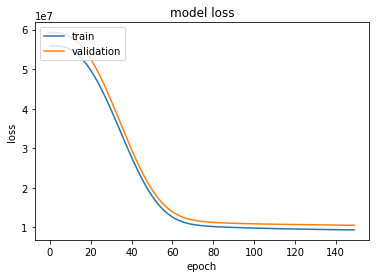

In [66]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_ann = model.predict(x_test)

In [ ]:
predANN = pd.DataFrame(list(zip(y_test,list(y_pred_ann.transpose()[0]))), columns  = ['ACTUAL', 'PREDICTED'] )
predANN

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

In [ ]:
print(history.history['mean_squared_error'][149])
#final mse after 150 epochs

In [ ]:
from sklearn.linear_model import LinearRegression as lr #import linear regression

In [ ]:
lm = lr()

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
predLR = pd.DataFrame(list(zip(y_test,y_pred)), columns  = ['ACTUAL', 'PREDICTED'] )
predLR

In [ ]:
mseANN = mse(y_test,list(y_pred_ann.transpose()[0]))
mseLR = mse(y_test,y_pred)

In [ ]:
mseANN

In [ ]:
mseLR

In [ ]:
mseANN<mseLR

In [ ]:
sns.lmplot('Actual','Predicted', pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted']))
plt.title('Linear Regression')

In [ ]:
sns.lmplot('Actual','Predicted', pd.DataFrame(list(zip(y_test,list(y_pred_ann.transpose()[0]))),columns=['Actual','Predicted']))
plt.title('ANN')

In [ ]:
plt.figure(figsize=[10,8])
plt.title('Correlation')
sns.heatmap(x.corr(), cmap='coolwarm')

c:\users\jo5h\anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


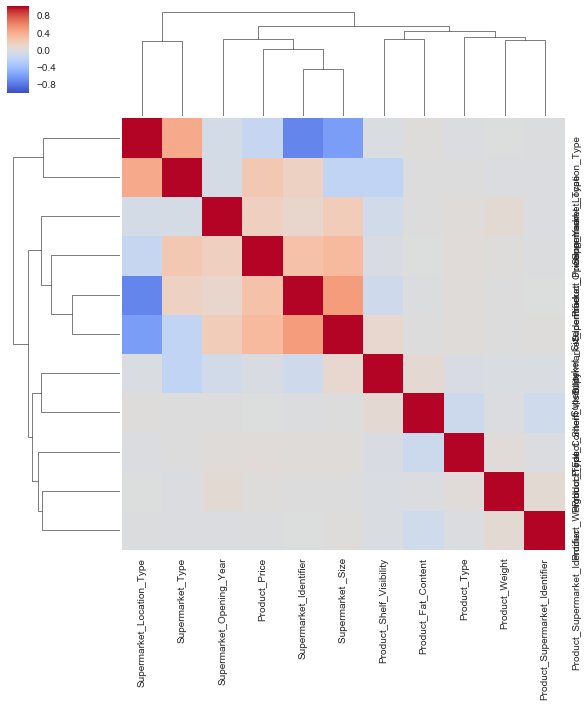

In [24]:
sns.clustermap(x.corr(), cmap='coolwarm')